In [15]:
# 필요한 라이브러리 설치 및 임포트

import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import recall_score as recall
import joblib

# [Step 3] 머신러닝 모델링1

#### **<span style="color:blue">[3-1] 학습 및 테스트 데이터 로딩</span>**

In [190]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
train_x = pd.read_csv("train_x.csv")
train_y = pd.read_csv("train_y.csv")
test_x = pd.read_csv("test_x.csv")
test_y = pd.read_csv("test_y.csv")

---

In [191]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((8759, 17), (8759, 1), (2160, 17), (2160, 1))

In [265]:
train_x.drop(['month', 'day', 'hour'], axis = 1, inplace = True)

In [267]:
test_x.drop(['month', 'day', 'hour'], axis = 1, inplace = True)

In [266]:
train_x.columns

Index(['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)', '습도(%)',
       '증기압(hPa)', '현지기압(hPa)', '지면온도(°C)', 'PM10_Lag1'],
      dtype='object')

In [192]:
train_x.drop('time', axis = 1, inplace = True)

In [193]:
test_x.drop('time', axis = 1, inplace = True)

In [98]:
import numpy as np

In [100]:
train_y = np.array(train_y)

In [105]:
train_y = train_y.reshape(-1)

In [268]:
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x_s = scaler.transform(train_x)
test_x_s = scaler.transform(test_x)

#### **<span style="color:blue">[3-2] 모델링: LinearRegression</span>**

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [197]:
from sklearn.model_selection import cross_val_score

In [ ]:
# cv(optional)
cv_score = cross_val_score(model, x_train, y_train, cv = 10, scoring = 'r2')

NameError: name 'y_train' is not defined

In [269]:
# LinearRegression 코드를 작성하세요.
model = LinearRegression()

model.fit(train_x_s, train_y)

LinearRegression()

In [270]:
# predict로 예측하여 y_pred_LR에 저장해보세요.
y_pred_LR = model.predict(test_x_s)


In [271]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
print('mse: ', mse(test_y, y_pred_LR))
print('r2_score: ',r2_score(test_y, y_pred_LR))

result = {}
result['LinearRegression'] = r2_score(test_y, y_pred_LR)

mse:  37.12086464180894
r2_score:  0.9328003472488261


In [ ]:
# 학습한 모델을 pkl 파일로 저장해보세요.




# [Step 4] 머신러닝 모델링2

#### **<span style="color:blue">(선택 수행)[4-1] 모델링: 랜덤포레스트</span>**

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R-squared Score(소수점 5째자리까지)

In [272]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

model = RFR(max_depth=5)

model.fit(train_x_s, train_y)

C:\Users\User\AppData\Local\Temp\ipykernel_3216\3309589577.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x_s, train_y)


RandomForestRegressor(max_depth=5)

In [273]:
# Test 데이터로 성능을 평가해보세요.

y_pred = model.predict(test_x_s)

In [274]:
print('mse: ', mse(test_y, y_pred))
print('r2_score: ',r2_score(test_y, y_pred))
result['RandomForestRegressor'] = r2_score(test_y, y_pred)

mse:  40.41605971046847
r2_score:  0.9268350776760936


In [275]:
# 학습한 모델을 파일로 저장해보세요.

train_y_n = np.array(train_y).reshape(-1)

In [276]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
# (선택) 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-2] 모델링: GradientBoosting</span>**

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [ ]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.



In [277]:
# Test 데이터로 성능을 평가해보세요.


model = GBR()
model.fit(train_x_s, train_y)

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [278]:
y_pred_GB = model.predict(test_x_s)

In [279]:
# 학습한 모델을 파일로 저장해보세요.

print('mse: ', mse(test_y, y_pred))
print('r2_score: ',r2_score(test_y, y_pred_GB))
result['GBoost'] = r2_score(test_y, y_pred_GB)


mse:  40.41605971046847
r2_score:  0.93256029931848


In [280]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인

# 최적 파라미터, 예측 최고 성능
print(list(train_x))
model.feature_importances_


['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)', '강수량(mm)', '습도(%)', '증기압(hPa)', '현지기압(hPa)', '지면온도(°C)', 'PM10_Lag1']


array([7.77100040e-05, 1.80165982e-03, 1.41797601e-03, 2.68865112e-04,
       9.72078490e-01, 1.09490083e-02, 4.19416178e-04, 6.63370902e-04,
       3.87484978e-03, 3.88443914e-04, 6.50333059e-03, 5.36962213e-04,
       1.01991745e-03])

In [ ]:
# 확인할 수 있는 인사이트
# 1. PM10이 가장 중요한 요인.
# 2. 1시간 뒤 미세먼지 농도는 1시간 전 미세먼지에 영향을 많이 받는다.
# 3.

#### **<span style="color:blue">(선택 수행)[4-3] 모델링: Self Choice Model</span>**

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : RMSE, R-squared Score(소수점 5째자리까지)

In [281]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

model = DTR()

model.fit(train_x_s, train_y)
y_pred = model.predict(test_x_s)

print('mse: ', mse(test_y, y_pred))
print('r2_score: ',r2_score(test_y, y_pred))
result['DTR'] = r2_score(test_y, y_pred)

mse:  102.84212962962962
r2_score:  0.8138255812199329


In [282]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

model = RFR(random_state = 2023)

model.fit(train_x_s, train_y_n)
y_pred = model.predict(test_x_s)

print('mse: ', mse(test_y, y_pred))
print('r2_score: ',r2_score(test_y, y_pred))
result['RFR'] = r2_score(test_y, y_pred)

mse:  44.29061222222222
r2_score:  0.9198210012027027


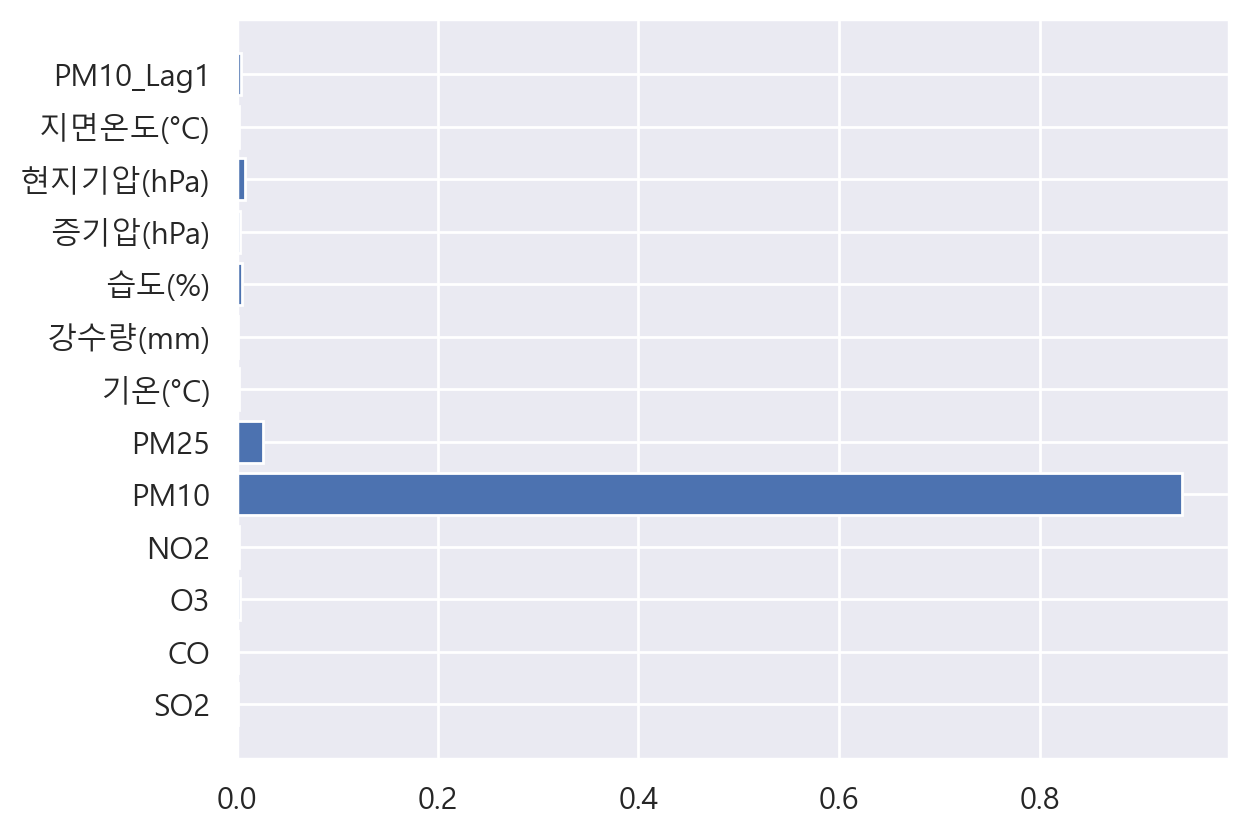

In [283]:
# Feature 중요도 확인
plt.barh(list(train_x), model.feature_importances_)
plt.show()

In [284]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

model = Ridge()

model.fit(train_x_s, train_y)
y_pred = model.predict(test_x_s)

print('mse: ', mse(test_y, y_pred))
print('r2_score: ',r2_score(test_y, y_pred))
result['Ridge'] = r2_score(test_y, y_pred)

mse:  40.54193954113849
r2_score:  0.9266071982613487


In [290]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(5))
print('=' * 40)

LinearRegression 0.9328
RandomForestRegressor 0.92684
GBoost 0.93256
DTR 0.81383
RFR 0.91982
Ridge 0.92661


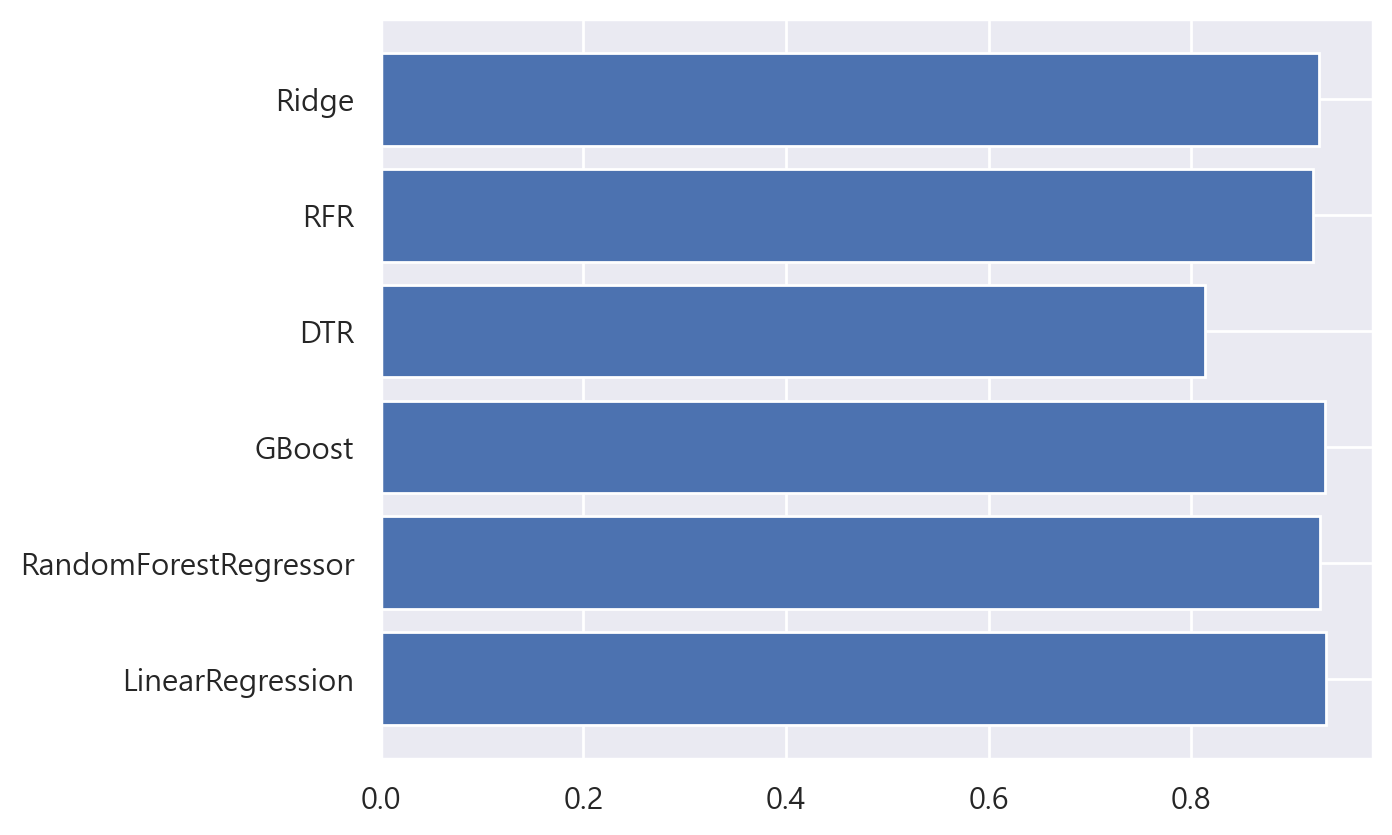

In [286]:
# 성능 시각화 비교
plt.barh(list(result.keys()), result.values())
plt.show()

In [ ]:
# 학습한 모델을 파일로 저장해보세요.




In [ ]:
# (다음 진행은 선택입니다)
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인



In [ ]:
# Feature의 중요도 확인





In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### **<span style="color:blue">(선택 수행)[4-4] 머신러닝 모델에 대해 성능 최적화 진행</span>**

* 위 머신러닝 모델들에 대해 성능 최적화를 진행해보세요.

In [184]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [287]:
model_dt = GBR(random_state=2023)

In [288]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

# 파라미터 선언
  # max_depth: 1~50
# 매개변수 이름 : 그 매개변수의 범위
param = {'max_depth': range(1, 30)} # cv값이 5면 50 * 5 = 250번 돌아가는 것

# Random Search 선언
  # cv=5
  # n_iter=20
  # scoring='r2'
model = RandomizedSearchCV(model_dt,    # 기본 모델
                           param,       # 파라미터 범위
                           cv = 5,      # k-Fold CV의 폴더 개수 = 몇 개로 나눌 거냐. 디폴트가 5다
                           n_iter = 20, # 랜덤하게 시도할 횟수 >> 랜덤이니까 전체 50 개 중에서 몇 20 개만 골라라 만약 랜덤 서치 50이라 하면 의미가 없죠?
                           scoring='r2' # 사용할 평가지표
                           ) # 랜덤서치씨브이는 최선의 모델을 선택하는 과정. 
    
    # 1부터 50까지 중에서 랜덤하게 20개 골라 5번을 곱하니까 100임

In [289]:
# 학습하기
model.fit(train_x_s, train_y_n)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=2023),
                   n_iter=20, param_distributions={'max_depth': range(1, 30)},
                   scoring='r2')

In [291]:
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

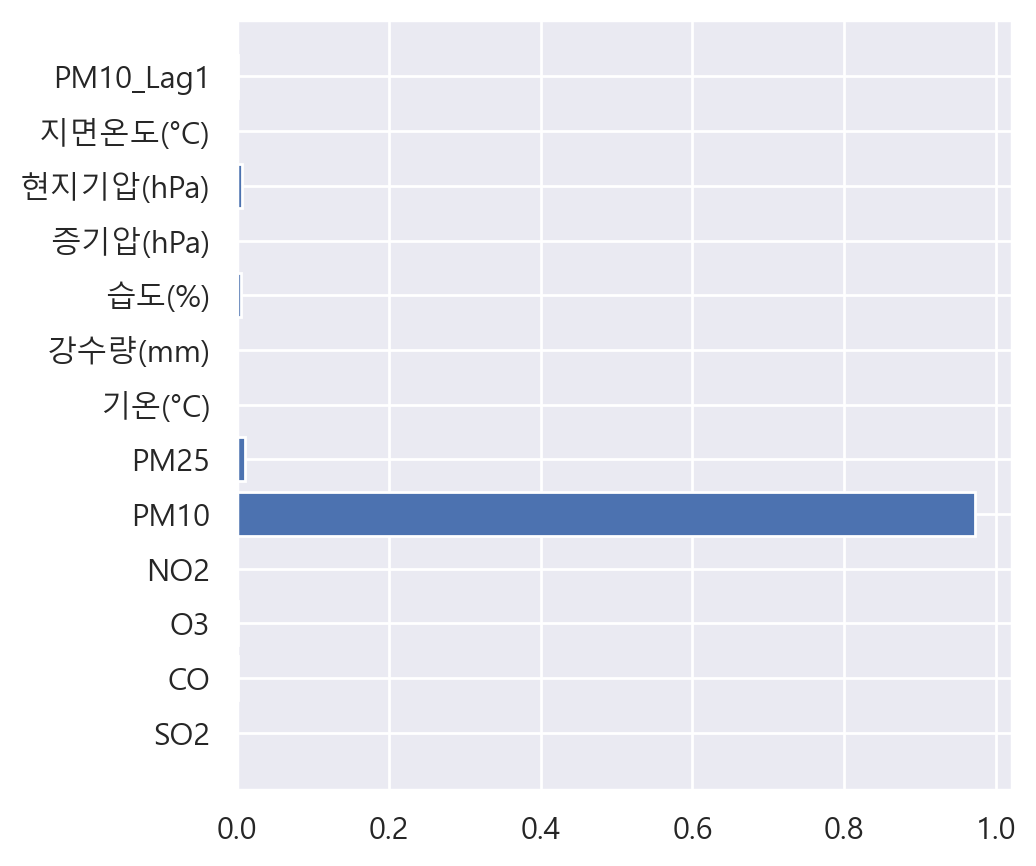

In [292]:
# 변수 중요도
plt.figure(figsize=(5, 5))
plt.barh(y=list(train_x), width=model.best_estimator_.feature_importances_)
plt.show()

In [293]:
# 예측하기
y_pred = model.predict(test_x_s)

In [294]:
# 평가하기
print('MAE:', mse(test_y, y_pred))
print('R2-Score:', r2_score(test_y, y_pred))

MAE: 36.888314021870734
R2-Score: 0.9332213320792634
